# INTRADAY STOCK TRADING PREDICTION USING DEEP LEARNING
- **Performed by - Isha Singh**
- **Model used - GRU**
- **Dataset - MSFT**


In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv("MSFT.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400
...,...,...,...,...,...,...,...
8852,2021-04-27,261.579987,263.190002,260.119995,261.970001,261.970001,31014200
8853,2021-04-28,256.079987,256.540009,252.949997,254.559998,254.559998,46903100
8854,2021-04-29,255.460007,256.100006,249.000000,252.509995,252.509995,40589000
8855,2021-04-30,249.740005,253.080002,249.600006,252.179993,252.179993,30929200


In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8857 entries, 0 to 8856
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8857 non-null   object 
 1   Open       8857 non-null   float64
 2   High       8857 non-null   float64
 3   Low        8857 non-null   float64
 4   Close      8857 non-null   float64
 5   Adj Close  8857 non-null   float64
 6   Volume     8857 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 484.5+ KB


## Summary of the data

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8857.000000,8857.000000,8857.000000,8857.000000,8857.000000,8.857000e+03
mean,34.831233,35.209355,34.449657,34.840895,29.886536,5.953411e+07
std,44.060163,44.513443,43.597704,44.080986,44.195101,3.858121e+07
min,0.088542,0.092014,0.088542,0.090278,0.057340,2.304000e+06
25%,3.843750,3.875000,3.812500,3.851563,2.446323,3.559720e+07
50%,26.590000,26.879999,26.290001,26.590000,18.686628,5.269680e+07
75%,36.730000,37.000000,36.110001,36.660000,27.218300,7.339520e+07
max,261.660004,263.190002,260.170013,261.970001,261.970001,1.031789e+09


## Checking for null values

In [7]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df['year'] = pd.to_datetime(df['Date']).dt.year
df['month'] = pd.to_datetime(df['Date']).dt.month
df['day'] = pd.to_datetime(df['Date']).dt.day
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,1986,3,13
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,1986,3,14
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,1986,3,17
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,1986,3,18
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,1986,3,19


In [9]:
df.nunique()

Date         8857
Open         4993
High         4943
Low          4959
Close        5149
Adj Close    6762
Volume       8677
year           36
month          12
day            31
dtype: int64

## Data Visualisation

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='High'>

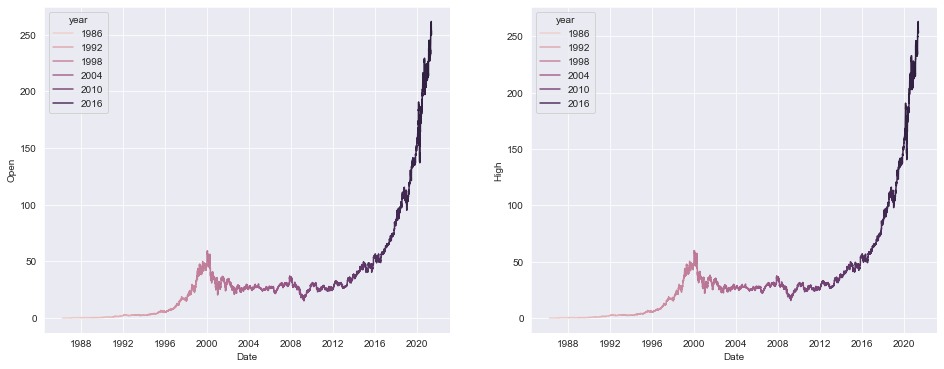

In [10]:
# check the trend of the close value every year
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.lineplot(df['Date'],df['Open'],hue=df['year']) #Open price
plt.subplot(1,2,2)
sns.lineplot(df['Date'],df['High'],hue=df['year']) #Close price

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='Volume'>

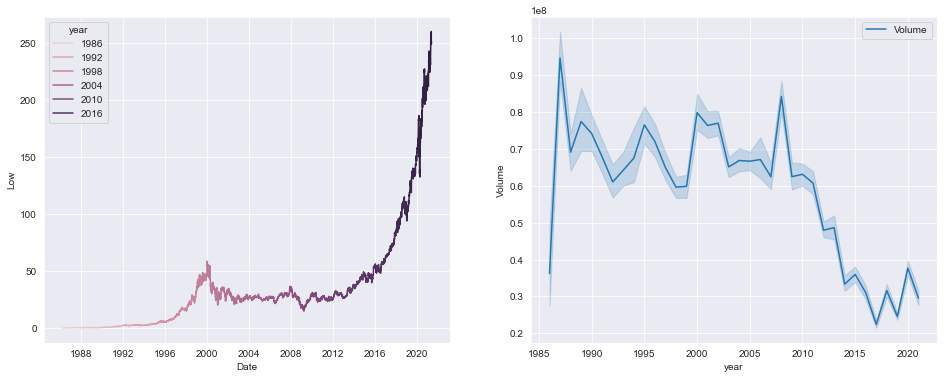

In [11]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.lineplot(df['Date'],df['Low'],hue=df['year']) #Open price
plt.subplot(1,2,2)
sns.lineplot(x="year",y="Volume", label="Volume", data=df) #Close price

## Insights from the graph
1. The stock prices started to rise from 1996 but took a dip in 2000 and got stable for a long period of time
2. We can observe that the price of the stock increased sharply from 2015. As the stocks became costly, the volume decreased accordingly.

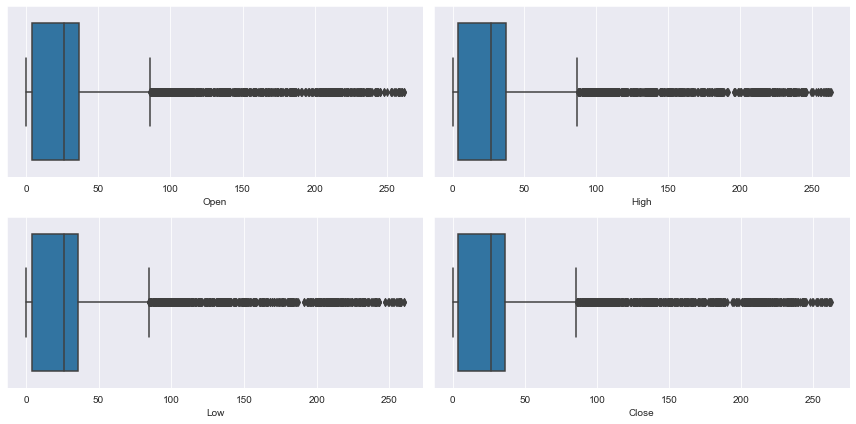

In [12]:
plt.figure(figsize=(12,6))
plt.subplot(221)
sns.boxplot(x=df['Open'])
plt.subplot(222)
sns.boxplot(x=df['High'])
plt.subplot(223)
sns.boxplot(x=df['Low'])
plt.subplot(224)
sns.boxplot(x=df['Close'])
plt.tight_layout()

<AxesSubplot:xlabel='Volume'>

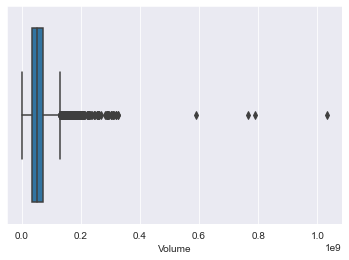

In [13]:
sns.boxplot(x=df['Volume'])

**There are a lot of outliers present in the data.**

## Range of the data

In [14]:
range_open=df['Open'].max()-df['Open'].min()
print("The range of open is : {}".format(range_open))
range_high=df['High'].max()-df['High'].min()
print("The range of high is : {}".format(range_high))
range_low=df['Low'].max()-df['Low'].min()
print("The range of low is : {}".format(range_low))
range_close=df['Close'].max()-df['Close'].min()
print("The range of close is : {}".format(range_open))

The range of open is : 261.5714616626501
The range of high is : 263.0979884415865
The range of low is : 260.0814714282751
The range of close is : 261.5714616626501


## Correlation of the columns

<AxesSubplot:>

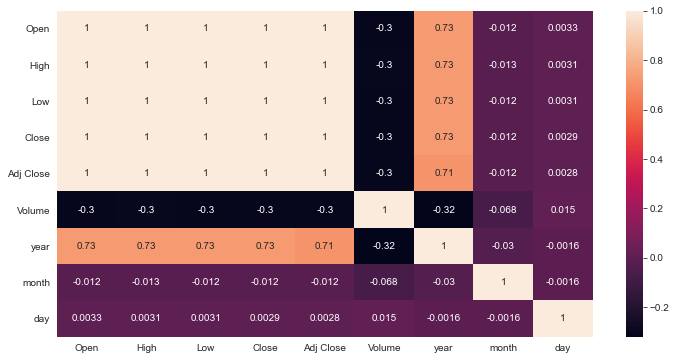

In [15]:
# Correlation between every column values
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

We see that the open ,high, low and close are largely correlated to each other.
The prices also relate to the year column

# Building the Model

## We will start by predicting the close price.

In [16]:
df1 = df.reset_index()['Close']

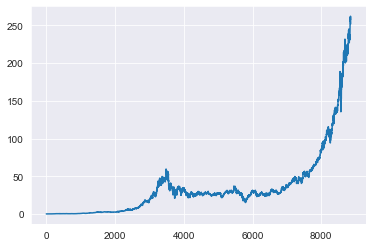

In [17]:
plt.plot(df1)

In [18]:
#GRU is sensitive to the scale of the data, so we apply MinMax Scalar
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [19]:
print(df1)

[[2.65159923e-05]
 [3.97739884e-05]
 [4.64067989e-05]
 ...
 [9.63876521e-01]
 [9.62616393e-01]
 [9.61394489e-01]]


In [20]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [21]:
len(train_data),len(test_data)

(5757, 3100)

In [22]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [23]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [24]:
print(X_train.shape), print(y_train.shape)

(5656, 100)
(5656,)


(None, None)

In [25]:
print(X_test.shape), print(ytest.shape)

(2999, 100)
(2999,)


(None, None)

In [26]:
# reshape input to be [samples, time steps, features] which is required for GRU
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [27]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import math
from sklearn.metrics import mean_squared_error

In [28]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer='SGD',loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50
38/38 [==============================] - 64s 481ms/step - loss: 0.0045
Epoch 2/50
38/38 [==============================] - 18s 467ms/step - loss: 0.0032
Epoch 3/50
38/38 [==============================] - 18s 471ms/step - loss: 0.0032
Epoch 4/50
38/38 [==============================] - 18s 470ms/step - loss: 0.0033
Epoch 5/50
38/38 [==============================] - 18s 470ms/step - loss: 0.0032
Epoch 6/50
38/38 [==============================] - 18s 476ms/step - loss: 0.0032
Epoch 7/50
38/38 [==============================] - 18s 468ms/step - loss: 0.0031
Epoch 8/50
38/38 [==============================] - 19s 490ms/step - loss: 0.0031
Epoch 9/50
38/38 [==============================] - 18s 475ms/step - loss: 0.0031
Epoch 10/50
38/38 [==============================] - 18s 475ms/step - loss: 0.0031
Epoch 11/50
38/38 [==============================] - 18s 473ms/step - loss: 0.0031
Epoch 12/50
38/38 [==============================] - 18s 474ms/step - loss: 0.0031
Epoch 13/50
3

In [30]:
### Lets Do the prediction and check performance metrics
train_predict=regressorGRU.predict(X_train)
test_predict=regressorGRU.predict(X_test)

In [31]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [32]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

16.42159548813016

In [33]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

21.69687459661186

The difference between the train data RMSE and the Test data RMSE is very less. Hence, our model has performed well.

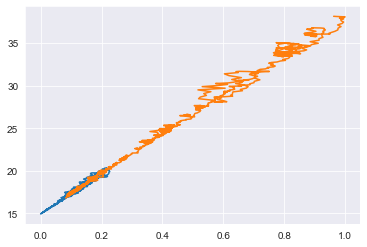

In [39]:
#plotting the predictions
plt.plot(y_train,train_predict)
plt.plot(ytest,test_predict)

## Now we will build a model for High prices.

In [40]:
df2 = df.reset_index()['High']

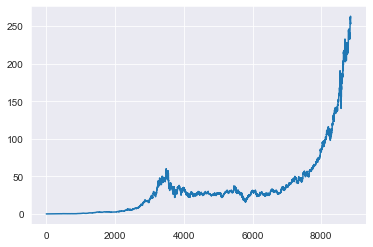

In [41]:
plt.plot(df2)

In [42]:
#GRU is sensitive to the scale of the data, so we apply MinMax Scalar
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [43]:
##splitting dataset into train and test split
training_size=int(len(df2)*0.65)
test_size=len(df2)-training_size
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:1]

In [44]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [45]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [46]:
print(X_train.shape), print(y_train.shape)

(5656, 100)
(5656,)


(None, None)

In [47]:
print(X_test.shape), print(ytest.shape)

(2999, 100)
(2999,)


(None, None)

In [48]:
# reshape input to be [samples, time steps, features] which is required for GRU
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [49]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer='SGD',loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50
38/38 [==============================] - 35s 531ms/step - loss: 0.0043
Epoch 2/50
38/38 [==============================] - 21s 550ms/step - loss: 0.0029
Epoch 3/50
38/38 [==============================] - 21s 550ms/step - loss: 0.0029
Epoch 4/50
38/38 [==============================] - 21s 547ms/step - loss: 0.0029
Epoch 5/50
38/38 [==============================] - 21s 549ms/step - loss: 0.0029
Epoch 6/50
38/38 [==============================] - 18s 481ms/step - loss: 0.0030
Epoch 7/50
38/38 [==============================] - 18s 478ms/step - loss: 0.0029
Epoch 8/50
38/38 [==============================] - 18s 481ms/step - loss: 0.0029
Epoch 9/50
38/38 [==============================] - 18s 479ms/step - loss: 0.0029
Epoch 10/50
38/38 [==============================] - 18s 483ms/step - loss: 0.0029
Epoch 11/50
38/38 [==============================] - 18s 479ms/step - loss: 0.0028
Epoch 12/50
38/38 [==============================] - 19s 503ms/step - loss: 0.0028
Epoch 13/50
3

In [74]:
### Lets Do the prediction and check performance metrics
train_predict_high=regressorGRU.predict(X_train)
test_predict_high=regressorGRU.predict(X_test)

In [75]:
##Transformback to original form
train_predict_high=scaler.inverse_transform(train_predict_high)
test_predict_high=scaler.inverse_transform(test_predict_high)

In [76]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict_high))

16.090073065332387

In [77]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict_high))

28.727486916127752

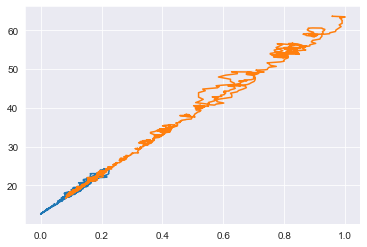

In [78]:
#plotting the predictions
plt.plot(y_train,train_predict_high)
plt.plot(ytest,test_predict_high)

## Building a model for Low Prices

In [57]:
df3 = df.reset_index()['Low']

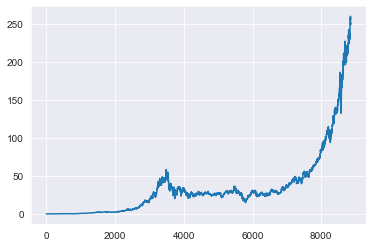

In [58]:
plt.plot(df3)

In [59]:
#GRU is sensitive to the scale of the data, so we apply MinMax Scalar
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df3=scaler.fit_transform(np.array(df3).reshape(-1,1))

In [60]:
##splitting dataset into train and test split
training_size=int(len(df3)*0.65)
test_size=len(df3)-training_size
train_data,test_data=df3[0:training_size,:],df3[training_size:len(df2),:1]

In [61]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [62]:
print(X_train.shape),print(y_train.shape)

(5656, 100)
(5656,)


(None, None)

In [63]:
print(X_test.shape),print(ytest.shape)

(2999, 100)
(2999,)


(None, None)

In [64]:
# reshape input to be [samples, time steps, features] which is required for GRU
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [65]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer='SGD',loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50
38/38 [==============================] - 30s 479ms/step - loss: 0.0038
Epoch 2/50
38/38 [==============================] - 20s 516ms/step - loss: 0.0026
Epoch 3/50
38/38 [==============================] - 20s 518ms/step - loss: 0.0026
Epoch 4/50
38/38 [==============================] - 20s 520ms/step - loss: 0.0025
Epoch 5/50
38/38 [==============================] - 20s 515ms/step - loss: 0.0025
Epoch 6/50
38/38 [==============================] - 20s 517ms/step - loss: 0.0026
Epoch 7/50
38/38 [==============================] - 20s 519ms/step - loss: 0.0025
Epoch 8/50
38/38 [==============================] - 20s 524ms/step - loss: 0.0025
Epoch 9/50
38/38 [==============================] - 21s 561ms/step - loss: 0.0024
Epoch 10/50
38/38 [==============================] - 20s 520ms/step - loss: 0.0024
Epoch 11/50
38/38 [==============================] - 20s 530ms/step - loss: 0.0024
Epoch 12/50
38/38 [==============================] - 20s 528ms/step - loss: 0.0023
Epoch 13/50
3

In [89]:
### Lets Do the prediction and check performance metrics
train_predict_low=regressorGRU.predict(X_train)
test_predict_low=regressorGRU.predict(X_test)

In [90]:
##Transformback to original form
train_predict_low=scaler.inverse_transform(train_predict_low)
test_predict_low=scaler.inverse_transform(test_predict_low)

In [91]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict_low))

16.090073065332387

In [92]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict_low))

28.727486916127752

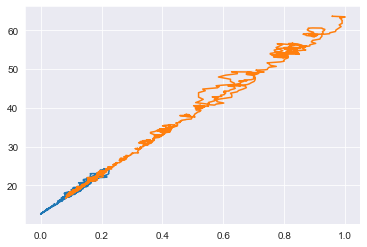

In [73]:
#plotting the predictions
plt.plot(y_train,train_predict_low)
plt.plot(ytest,test_predict_low)

# Thank you!